In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/Cornelius/Desktop/ML/Machine Learning Full (1)/Linear Regression/1000_Companies.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [34]:
y=df.iloc[:,4].values
x=df.iloc[:,:-1].values
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

In [21]:
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

<Axes: >

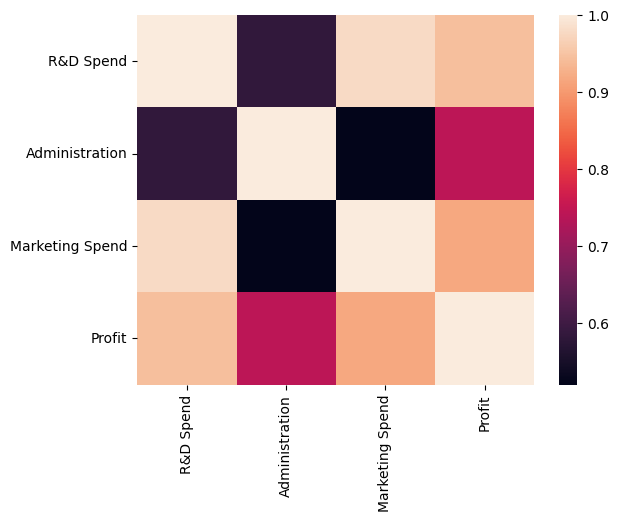

In [16]:
# Data visualization
# building the correlation matrix 
sns.heatmap(df[["R&D Spend",'Administration',"Marketing Spend",'Profit']].corr())

In [35]:
x[:,3]

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Flori

In [36]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])

# OneHotEncoder for the categorical column (let's assume it's the 0th column)
column_transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), [3])],
    remainder='passthrough'
)

# Apply the transformation and convert it to an array
x = column_transformer.fit_transform(x)

print(x)


[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [1.0 0.0 0.0 100275.47 241926.31 227142.82]
 [1.0 0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 0.0 1.0 161181.72 270939.86 295442.17]]


In [37]:
x=x[:,1:]
x

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [41]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
from sklearn.linear_model import LinearRegression
model_fit=LinearRegression()
model_fit.fit(x_train,y_train)


LinearRegression()

In [43]:
y_pred=model_fit.predict(x_test)
y_pred

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.22936439,  91473.37719687,
       164597.05380606,  53222.82667402,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.91053061,  75316.28143051,
       118248.14406603, 164574.40699901, 170937.2898107 , 182069.11645083,
       118845.0325269 ,  85669.95112229, 180992.59396143,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669092,  56881.41475225,
        68896.39346906, 210040.00765882, 120778.72270894, 111724.87157655,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130747, 174644.26529204, 117671.49128195,
        96731.37857434, 165452.25779409, 107724.34331255,  50194.54176914,
       116513.89532179,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

In [44]:
# calculating the coefficient
print(model_fit.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [45]:
## calculating the intercept
print(model_fit.intercept_)

-51035.22972401939


In [46]:
# calculating the r square valued 
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9112695892268878